## Load Temp/Precip Dataframe

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/

Mounted at /gdrive
/gdrive


In [ ]:
%cd/gdrive/Shareddrives/Capstone Project/Data/TempPrecip

/gdrive/Shareddrives/Capstone Project/Data/TempPrecip


In [ ]:
import pandas as pd
import numpy as np
import io
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pre = pd.read_csv('Avg_Precip_W.csv')

In [ ]:
pre['date'] = pd.to_datetime(pre['date'], format = '%Y-%m-%d')

In [ ]:
pre['Year'] = pre['date'].dt.year

In [ ]:
pre.describe()

,fips,ave_precip,Year
count,61504.000000,61320.000000,61504.000000
mean,36062.000000,0.123212,2011.001008
std,35.791351,0.111480,5.481226
min,36001.000000,0.000000,2002.000000
25%,36031.000000,0.041125,2006.000000
50%,36062.000000,0.095649,2011.000000
75%,36093.000000,0.175853,2016.000000
max,36123.000000,1.937012,2020.000000


In [ ]:
pre.rename(columns = {'county' : 'County'}, inplace = True)

In [ ]:
pre['County'] = pre['County'].str.lower() 

In [ ]:
pre

,date,fips,ave_precip,County,Year
0,2002-01-02,36001,0.144079,albany,2002
1,2002-01-09,36001,0.022998,albany,2002
2,2002-01-16,36001,0.032691,albany,2002
3,2002-01-23,36001,0.024288,albany,2002
4,2002-01-30,36001,0.200828,albany,2002
...,...,...,...,...,...
61499,2020-12-02,36123,0.034154,yates,2020
61500,2020-12-09,36123,0.013186,yates,2020
61501,2020-12-16,36123,0.105332,yates,2020
61502,2020-12-23,36123,0.214367,yates,2020


In [ ]:
temp = pd.read_csv('Temp_W.csv')

In [ ]:
temp['date'] = pd.to_datetime(temp['date'], format = '%Y-%m-%d')

In [ ]:
temp['Year'] = temp['date'].dt.year

In [ ]:
temp.rename(columns = {'county' : 'County'}, inplace = True)

In [ ]:
temp['County'] = temp['County'].str.lower()

## Load Corn Datarame

In [ ]:
%cd/gdrive/Shareddrives/Capstone Project/Data/USDA

/gdrive/Shareddrives/Capstone Project/Data/USDA


In [ ]:
corn = pd.read_csv('corn_cleaned.csv')

In [ ]:
# Make USDA Data Item subsets
corn_yield = corn[corn["Data Item"]=="CORN GRAIN - YIELD MEASURED IN BU / ACRE"].copy()
corn_acrplanted = corn[corn["Data Item"]=="CORN - ACRES PLANTED"].copy()

In [ ]:
corn_acrplanted['County'] = corn_acrplanted['County'].str.lower()
corn_acrplanted

In [ ]:
corn_yield['County'] = corn_yield['County'].str.lower()
corn_yield

## Correlation yield_pre

In [ ]:
pre_q = pre.groupby(['Year','County'])[['ave_precip']].describe().reset_index()

In [ ]:
pre_q['County'] = pre_q['County'].str.lower()

In [ ]:
pre_q.columns = pre_q.columns.droplevel()

In [ ]:
pre_q.columns = ['Year', 'County', 'avg_precip_count','avg_precip_mean','avg_precip_std','avg_precip_min','avg_precip_25%','avg_precip_50%','avg_precip_75%','avg_precip_max']

In [ ]:
yield_pre = corn_yield.merge(pre_q, how='inner', on =['Year','County'])

In [ ]:
yield_pre.corr()

,Year,Ag District Code,County ANSI,Value,avg_precip_count,avg_precip_mean,avg_precip_std,avg_precip_min,avg_precip_25%,avg_precip_50%,avg_precip_75%,avg_precip_max
Year,1.000000,-0.056668,0.010335,0.570307,-0.121817,-0.007334,-0.230315,0.241652,0.314255,0.112086,-0.095010,-0.066073
Ag District Code,-0.056668,1.000000,-0.034950,-0.128268,0.046183,0.220744,0.348956,-0.064919,-0.014359,0.067711,0.232694,0.302939
County ANSI,0.010335,-0.034950,1.000000,0.008899,0.042847,-0.151622,-0.030237,-0.062060,-0.168271,-0.147663,-0.137584,-0.008734
Value,0.570307,-0.128268,0.008899,1.000000,-0.057764,-0.098167,-0.227533,0.115112,0.135698,0.052205,-0.165865,-0.104423
avg_precip_count,-0.121817,0.046183,0.042847,-0.057764,1.000000,0.001902,0.017590,-0.581391,-0.041777,0.037302,0.024031,-0.002654
avg_precip_mean,-0.007334,0.220744,-0.151622,-0.098167,0.001902,1.000000,0.645649,0.095407,0.681440,0.835577,0.896626,0.483793
avg_precip_std,-0.230315,0.348956,-0.030237,-0.227533,0.017590,0.645649,1.000000,-0.081599,0.049985,0.267034,0.512336,0.897653
avg_precip_min,0.241652,-0.064919,-0.062060,0.115112,-0.581391,0.095407,-0.081599,1.000000,0.199337,0.123502,0.035245,-0.036276
avg_precip_25%,0.314255,-0.014359,-0.168271,0.135698,-0.041777,0.681440,0.049985,0.199337,1.000000,0.721161,0.552561,0.050398
avg_precip_50%,0.112086,0.067711,-0.147663,0.052205,0.037302,0.835577,0.267034,0.123502,0.721161,1.000000,0.734141,0.187157


> Takeaways:


*   The lower 25% quartile is slightly positive (0.135698) correlated to the yield value.


*   The upper 75% quartile is slightly negative (-0.165865) correlated to the yield value.


*   Overall, there is a slight negative relationship (-0.098167) between the average precip value and the yield value. 


*   So it seems that while the corn crop requires some precipitation, higher precipitations may be detrimental to the crop










In [ ]:
# doload the dataframe to csv
yield_pre.to_csv('yield_pre.csv',index=False)
from google.colab import files

files.download('yield_pre.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Correlation archplant_ precip

In [ ]:
acrplanted_pre = corn_acrplanted.merge(pre_q, how='inner', on =['Year','County'])

In [ ]:
acrplanted_pre.corr()

,Year,Ag District Code,County ANSI,Value,avg_precip_count,avg_precip_mean,avg_precip_std,avg_precip_min,avg_precip_25%,avg_precip_50%,avg_precip_75%,avg_precip_max
Year,1.000000,-0.056668,0.010335,0.168561,-0.121817,-0.007334,-0.230315,0.241652,0.314255,0.112086,-0.095010,-0.066073
Ag District Code,-0.056668,1.000000,-0.034950,-0.568283,0.046183,0.220744,0.348956,-0.064919,-0.014359,0.067711,0.232694,0.302939
County ANSI,0.010335,-0.034950,1.000000,0.023360,0.042847,-0.151622,-0.030237,-0.062060,-0.168271,-0.147663,-0.137584,-0.008734
Value,0.168561,-0.568283,0.023360,1.000000,-0.006047,-0.303128,-0.410610,-0.006939,-0.003006,-0.118271,-0.299615,-0.316180
avg_precip_count,-0.121817,0.046183,0.042847,-0.006047,1.000000,0.001902,0.017590,-0.581391,-0.041777,0.037302,0.024031,-0.002654
avg_precip_mean,-0.007334,0.220744,-0.151622,-0.303128,0.001902,1.000000,0.645649,0.095407,0.681440,0.835577,0.896626,0.483793
avg_precip_std,-0.230315,0.348956,-0.030237,-0.410610,0.017590,0.645649,1.000000,-0.081599,0.049985,0.267034,0.512336,0.897653
avg_precip_min,0.241652,-0.064919,-0.062060,-0.006939,-0.581391,0.095407,-0.081599,1.000000,0.199337,0.123502,0.035245,-0.036276
avg_precip_25%,0.314255,-0.014359,-0.168271,-0.003006,-0.041777,0.681440,0.049985,0.199337,1.000000,0.721161,0.552561,0.050398
avg_precip_50%,0.112086,0.067711,-0.147663,-0.118271,0.037302,0.835577,0.267034,0.123502,0.721161,1.000000,0.734141,0.187157


In [ ]:
# doload the dataframe to csv
acrplanted_pre.to_csv('acrplanted_pre.csv',index=False)
from google.colab import files

files.download('acrplanted_pre.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Takeaways between acres planted and precipitation:


*   The lower 25% quartile is -0.003006, which is a slight negative correlation
*   The 75% quartile is -0.299615, more of a negative correlation compared to 25% quartile


*   Overall there is a negative relationship between the average precipitation and the acres planted --> -0.303128
*   In conclusion, there is a negative correlation between acres planted for all values of precipitation. The strength of the negative correlation seems to be higher as precipitation increases. Perhaps the more rain, farmers plant less/there is less usuable land to plant crops.





## Modeling 
> Regression Model: yield value on average precipitation value

In [ ]:
m1 = acrplanted_pre[['Value','avg_precip_mean']].copy()
#m1_n = m1.select_dtypes('number')


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

m1_scaled = sc.fit_transform(m1)

m1_s = pd.DataFrame(m1_scaled, columns=m1.columns, index=m1.index)


In [ ]:
# Define X and y 
X = m1_s[['avg_precip_mean']]
y = m1_s[['Value']]

In [ ]:
# import train_Test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Split teh dataframe into train, validation, and test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = 0 )

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = 0 ) 

print(x_train, x_val, x_test)


# build the model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

y_pre = model.predict(x_val) 

regression_results(y_val, y_pre)

*   the R2 value is 0.015 whereas the RMSE is 16742. It is possible that it is because the model contains one input variable.



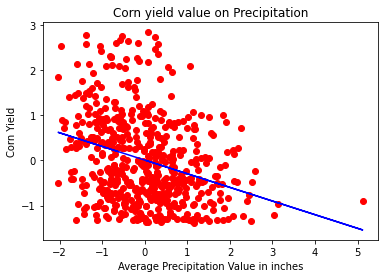

In [ ]:
# revise the plot into time-series 
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title('Corn yield value on Precipitation')
plt.xlabel('Average Precipitation Value in inches')
plt.ylabel('Corn Yield')
plt.show()


In [ ]:
import sklearn.metrics as metrics
def regression_results(y_val, y_pre):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_val, y_pre)
    mean_absolute_error=metrics.mean_absolute_error(y_val, y_pre) 
    mse=metrics.mean_squared_error(y_val, y_pre) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_val, y_pre)
    median_absolute_error=metrics.median_absolute_error(y_val, y_pre)
    r2=metrics.r2_score(y_val, y_pre)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

> random forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor


X = acrplanted_pre[['avg_precip_mean']]
y = acrplanted_pre[['Value']]

# Split teh dataframe into train, validation, and test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = 0 )

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = 0 ) 

print(x_train, x_val, x_test)

#Create a Gaussian Classifier
regressor=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_val)

regression_results(y_val, y_pred)

     avg_precip_mean
109         0.109285
700         0.093548
101         0.110749
499         0.127610
319         0.118222
..               ...
707         0.089373
192         0.131847
629         0.137730
559         0.098690
684         0.122314

[539 rows x 1 columns]      avg_precip_mean
302         0.116680
652         0.111292
79          0.130277
175         0.109255
489         0.148837
..               ...
542         0.136360
569         0.138710
487         0.148556
521         0.138965
625         0.136049

[108 rows x 1 columns]      avg_precip_mean
249         0.088331
40          0.129329
293         0.152739
711         0.078726
211         0.093840
..               ...
306         0.112691
390         0.138689
251         0.095790
245         0.116946
27          0.092201

[72 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


explained_variance:  -0.2626
r2:  -0.2711
MAE:  14537.7222
MSE:  325793307.3333
RMSE:  18049.7454




*   The R2 value for the random forest regressor model is negative, -0.2581, the RMSE is also very high, 17956; and we don't know how to interperate this result.



> GaussianNB


In [ ]:
from sklearn.naive_bayes import GaussianNB

X = acrplanted_pre[['avg_precip_mean']]
y = acrplanted_pre[['Value']]

# Split teh dataframe into train, validation, and test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = 0 )

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = 0 ) 

print(x_train, x_val, x_test)

gauss = GaussianNB()
gauss.fit(x_train, y_train)
y_pred_gauss = gauss.predict(x_val)

regression_results(y_val, y_pred_gauss)


     avg_precip_mean
109         0.109285
700         0.093548
101         0.110749
499         0.127610
319         0.118222
..               ...
707         0.089373
192         0.131847
629         0.137730
559         0.098690
684         0.122314

[539 rows x 1 columns]      avg_precip_mean
302         0.116680
652         0.111292
79          0.130277
175         0.109255
489         0.148837
..               ...
542         0.136360
569         0.138710
487         0.148556
521         0.138965
625         0.136049

[108 rows x 1 columns]      avg_precip_mean
249         0.088331
40          0.129329
293         0.152739
711         0.078726
211         0.093840
..               ...
306         0.112691
390         0.138689
251         0.095790
245         0.116946
27          0.092201

[72 rows x 1 columns]
explained_variance:  -0.578
r2:  -0.5783
MAE:  15441.6667
MSE:  404525277.7778
RMSE:  20112.8138


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The R2 value for the random forest regressor model is negative, -0.5783, the RMSE is also very high, 20112; and we don't know how to interperate this result.

## Correlation yield_temp

In [ ]:
temp.groupby('Year')[['avg_temp','max_temp','min_temp']].describe()

avg_temp                        ...   min_temp                      
        count       mean        std  ...        50%        75%        max
Year                                 ...                                 
2000   3286.0  44.982304  18.003541  ...  55.417940  72.055030  85.019438
2001   3224.0  47.532635  16.886817  ...  60.530370  74.484893  94.442924
2002   3224.0  47.457651  17.169692  ...  54.487385  75.258247  93.398512
2003   3224.0  45.140640  19.108362  ...  58.634626  71.432017  87.610189
2004   3224.0  45.865212  18.593421  ...  57.643311  73.500463  85.706879
2005   3224.0  46.934094  19.868793  ...  56.916784  76.624390  94.359915
2006   3286.0  48.184889  15.929347  ...  58.628184  70.171318  95.524027
2007   3224.0  46.094154  19.229795  ...  60.920334  75.583717  90.904861
2008   3224.0  46.475537  17.353549  ...  58.626908  73.578053  93.022632
2009   3224.0  45.704706  17.611530  ...  56.599293  72.070916  92.684656
2010   3224.0  48.179135  18.124122  ...  58.522478  74.166375  97.486219
2011   3224.0  47.903169  18.373302  ...  57.659169  74.341863  94.453493
2012   3286.0  49.172958  16.679682  ...  59.912603  76.069362  93.591389
2013   3224.0  46.585742  18.148593  ...  58.867265  72.841151  93.616464
2014   3224.0  45.450965  18.820285  ...  57.682921  73.518431  88.079589
2015   3224.0  46.517797  19.947499  ...  59.991863  74.986415  90.524560
2016   3224.0  48.448195  17.792092  ...  58.125128  77.804366  93.523931
2017   3286.0  46.999982  17.944671  ...  61.701023  72.761611  89.834435
2018   3224.0  47.614373  18.443186  ...  53.388032  75.268714  92.403394
2019   3224.0  46.287868  18.183240  ...  57.928773  72.579418  91.469022
2020   3224.0  48.652195  16.603494  ...  56.459473  75.191253  92.570170

[21 rows x 24 columns]

In [ ]:
temp_q = temp.groupby(['Year','County'])[['avg_temp','max_temp','min_temp']].describe().reset_index()

In [ ]:
temp_q['County'] = temp_q['County'].str.lower()

In [ ]:
temp_q.columns = temp_q.columns.droplevel()

In [ ]:
temp_q.columns = ['Year', 'County', 'avg_temp_count','avg_temp_mean','avg_temp_std','avg_temp_min','avg_temp_25%','avg_temp_50%','avg_temp_75%','avg_temp_max', 'max_temp_count','max_temp_mean','max_temp_std','max_temp_min','max_temp_25%','max_temp_50%','max_temp_75%','max_temp_max', 'min_temp_count','min_temp_mean','min_temp_std','min_temp_min','min_temp_25%','min_temp_50%','min_temp_75%','min_temp_max']

In [ ]:
yield_temp = corn_yield.merge(temp_q, how='inner', on =['Year','County'])

In [ ]:
yield_temp.corr()

,Year,Ag District Code,County ANSI,Value,avg_temp_count,avg_temp_mean,avg_temp_std,avg_temp_min,avg_temp_25%,avg_temp_50%,avg_temp_75%,avg_temp_max,max_temp_count,max_temp_mean,max_temp_std,max_temp_min,max_temp_25%,max_temp_50%,max_temp_75%,max_temp_max,min_temp_count,min_temp_mean,min_temp_std,min_temp_min,min_temp_25%,min_temp_50%,min_temp_75%,min_temp_max
Year,1.000000,-0.055863,0.014741,0.641986,-0.019749,0.198705,0.060285,-0.051506,0.131560,0.147398,0.254297,0.050481,-0.019749,0.161669,0.033823,-0.035379,0.126570,0.159928,0.157930,0.009940,-0.019749,0.161669,0.033823,-0.035379,0.126570,0.159928,0.157930,0.009940
Ag District Code,-0.055863,1.000000,-0.028673,-0.131173,0.018566,0.205193,-0.320764,0.206598,0.267495,0.137393,0.008599,-0.025104,0.018566,0.361532,-0.305213,0.237399,0.350388,0.250938,0.110354,0.065768,0.018566,0.361532,-0.305213,0.237399,0.350388,0.250938,0.110354,0.065768
County ANSI,0.014741,-0.028673,1.000000,0.011762,-0.012865,0.172784,-0.065840,0.092428,0.154077,0.136757,0.131350,0.103612,-0.012865,0.120953,-0.087041,0.086111,0.124309,0.074215,0.057440,0.031116,-0.012865,0.120953,-0.087041,0.086111,0.124309,0.074215,0.057440,0.031116
Value,0.641986,-0.131173,0.011762,1.000000,-0.102944,0.161688,0.107228,-0.032529,0.074283,0.208133,0.217499,0.063230,-0.102944,0.081123,0.112906,-0.095823,0.011363,0.195292,0.094587,-0.005012,-0.102944,0.081123,0.112906,-0.095823,0.011363,0.195292,0.094587,-0.005012
avg_temp_count,-0.019749,0.018566,-0.012865,-0.102944,1.000000,0.093106,-0.399609,-0.054279,0.343240,0.103424,-0.251788,-0.233664,1.000000,0.055970,-0.451532,0.015111,0.333277,0.090037,-0.300045,-0.290288,1.000000,0.055970,-0.451532,0.015111,0.333277,0.090037,-0.300045,-0.290288
avg_temp_mean,0.198705,0.205193,0.172784,0.161688,0.093106,1.000000,-0.575673,0.703648,0.790330,0.627001,0.697412,0.650338,0.093106,0.917246,-0.505916,0.681438,0.731319,0.415486,0.472432,0.508183,0.093106,0.917246,-0.505916,0.681438,0.731319,0.415486,0.472432,0.508183
avg_temp_std,0.060285,-0.320764,-0.065840,0.107228,-0.399609,-0.575673,1.000000,-0.778407,-0.587171,-0.266341,0.018909,-0.229905,-0.399609,-0.508146,0.909864,-0.774282,-0.562352,-0.189857,0.111342,-0.178918,-0.399609,-0.508146,0.909864,-0.774282,-0.562352,-0.189857,0.111342,-0.178918
avg_temp_min,-0.051506,0.206598,0.092428,-0.032529,-0.054279,0.703648,-0.778407,1.000000,0.440218,0.296463,0.334254,0.591910,-0.054279,0.653266,-0.599716,0.943642,0.422303,0.193440,0.238404,0.596868,-0.054279,0.653266,-0.599716,0.943642,0.422303,0.193440,0.238404,0.596868
avg_temp_25%,0.131560,0.267495,0.154077,0.074283,0.343240,0.790330,-0.587171,0.440218,1.000000,0.467883,0.392707,0.338958,0.343240,0.692099,-0.621387,0.421084,0.923695,0.312494,0.149942,0.132955,0.343240,0.692099,-0.621387,0.421084,0.923695,0.312494,0.149942,0.132955
avg_temp_50%,0.147398,0.137393,0.136757,0.208133,0.103424,0.627001,-0.266341,0.296463,0.467883,1.000000,0.400169,0.209936,0.103424,0.595175,-0.239224,0.253886,0.438453,0.866826,0.282728,0.098475,0.103424,0.595175,-0.239224,0.253886,0.438453,0.866826,0.282728,0.098475


> Takeaways:


*   Overall, as average temperature increases from 25% quartile to 75% quartile the correlation between yield and temperate becomes more positive. (.07 to .21). THe average temp mean is about .16 which is a weak, but positive correlation between temperatures and yield.
*   The max and min temeprature average are both about .08.


*   In conclusion, for average temeperates, warmer temperatures appear to be associated with more crop output. However, with the max average temperature, there is a weaker relationship (.06) indicating that when temps are too high, this also is not good for corn crop.






In [ ]:
# doload the dataframe to csv
yield_temp.to_csv('yield_temp.csv',index=False)
from google.colab import files

files.download('yield_temp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model

In [ ]:
##Linear Regression

#m2 = yield_temp[['Value','avg_temp_mean']].copy()
#m1_n = m1.select_dtypes('number')



#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()

#m2_scaled = sc.fit_transform(m2)

#m2_s = pd.DataFrame(m2_scaled, columns=m2.columns, index=m2.index)
#y_pre = model.predict(x_val) 


X = yield_temp[['avg_temp_mean']]
y = yield_temp[['Value']]

# Split teh dataframe into train, validation, and test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = 0 )

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = 0 ) 

print(x_train, x_val, x_test)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

y_pre = model.predict(x_val)

regression_results(y_val, y_pre)

     avg_temp_mean
811      45.793223
640      42.027674
587      44.056382
538      47.951696
425      45.352303
..             ...
763      48.644869
192      46.450214
629      44.977254
559      47.578352
684      46.644163

[615 rows x 1 columns]      avg_temp_mean
344      48.103764
193      45.980473
215      47.265765
77       49.118819
477      48.172241
..             ...
249      48.315270
240      45.235898
475      47.419647
141      45.263810
375      44.625158

[123 rows x 1 columns]      avg_temp_mean
685      52.580139
658      45.884336
14       48.308853
746      46.005471
157      45.569293
..             ...
592      47.815608
392      49.441015
774      44.183321
638      43.776435
204      45.313888

[83 rows x 1 columns]
explained_variance:  -0.0004
r2:  -0.0017
MAE:  21.0513
MSE:  776.9209
RMSE:  27.8733




*   Negative R2 value, -0.0017; whereas the RMSE value is not very large. 



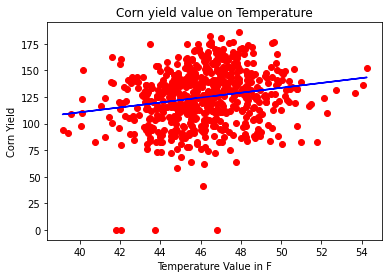

In [ ]:
# revise the plot into time-series 
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title('Corn yield value on Temperature')
plt.xlabel('Temperature Value in F')
plt.ylabel('Corn Yield')
plt.show()


(array([ 5.,  6., 11., 21., 30., 25., 17.,  6.,  1.,  1.]),
 array([114.55829323, 116.99983333, 119.44137343, 121.88291353,
        124.32445363, 126.76599373, 129.20753383, 131.64907393,
        134.09061403, 136.53215413, 138.97369423]),
 <a list of 10 Patch objects>)

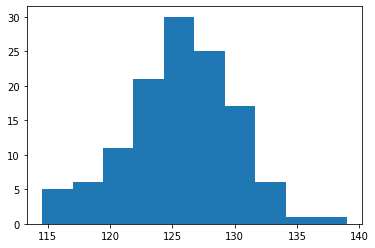

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_pre)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = yield_temp[['avg_temp_mean']]
y = yield_temp[['Value']]

# Split teh dataframe into train, validation, and test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = 0 )

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = 0 ) 

print(x_train, x_val, x_test)



#Create a Gaussian Classifier
regressor=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
regressor.fit(x_train,y_train)

y_pre= regressor.predict(x_val)

regression_results(y_val, y_pre)

     avg_temp_mean
811      45.793223
640      42.027674
587      44.056382
538      47.951696
425      45.352303
..             ...
763      48.644869
192      46.450214
629      44.977254
559      47.578352
684      46.644163

[615 rows x 1 columns]      avg_temp_mean
344      48.103764
193      45.980473
215      47.265765
77       49.118819
477      48.172241
..             ...
249      48.315270
240      45.235898
475      47.419647
141      45.263810
375      44.625158

[123 rows x 1 columns]      avg_temp_mean
685      52.580139
658      45.884336
14       48.308853
746      46.005471
157      45.569293
..             ...
592      47.815608
392      49.441015
774      44.183321
638      43.776435
204      45.313888

[83 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


explained_variance:  -0.6451
r2:  -0.646
MAE:  26.8891
MSE:  1276.6852
RMSE:  35.7307




*   Negative R2 value, -0.6773; whereas the RMSE value is not very large.



In [ ]:
# Gaussian 
from sklearn.naive_bayes import GaussianNB

#m2 = yield_temp[['Value','avg_temp_mean']].copy()
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#m2_scaled = sc.fit_transform(m2)
#m2_s = pd.DataFrame(m2_scaled, columns=m2.columns, index=m2.index)
## if we use the standard scaler, the r_2 is -13088.8065
## so we decided to not use the sc function


X = yield_temp[['avg_temp_mean']]
y = yield_temp[['Value']]

# Split teh dataframe into train, validation, and test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = 0 )

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = 0 ) 

print(x_train, x_val, x_test)

##convert y_train from continous to multiclass
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

gauss = GaussianNB()
gauss.fit(x_train, training_scores_encoded)
y_pred_gauss = gauss.predict(x_val)

regression_results(y_val, y_pred_gauss)

     avg_temp_mean
811      45.793223
640      42.027674
587      44.056382
538      47.951696
425      45.352303
..             ...
763      48.644869
192      46.450214
629      44.977254
559      47.578352
684      46.644163

[615 rows x 1 columns]      avg_temp_mean
344      48.103764
193      45.980473
215      47.265765
77       49.118819
477      48.172241
..             ...
249      48.315270
240      45.235898
475      47.419647
141      45.263810
375      44.625158

[123 rows x 1 columns]      avg_temp_mean
685      52.580139
658      45.884336
14       48.308853
746      46.005471
157      45.569293
..             ...
592      47.815608
392      49.441015
774      44.183321
638      43.776435
204      45.313888

[83 rows x 1 columns]
explained_variance:  -7.071
r2:  -8.5725
MAE:  77.1033
MSE:  7424.5947
RMSE:  86.1661


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




*   Negative R2 value, -8.5725; whereas the RMSE value is relatively larger than the linera regression model and random forest regressor model.



## Correlation archplant_temp

In [ ]:
acrplanted_temp = corn_acrplanted.merge(temp_q, how='inner', on =['Year','County'])

In [ ]:
acrplanted_temp.corr()

Takeaways


*   Overall, as average temperatures increase, acres planted also increases across the quartiles (.03 to .19)
*   With max temp mean, there is a slightly negative correlation, -.006, and with min temp mean there is a slightly negative correlation, also at -.006.


*   Overall, it seems that the is no clear indication of how acres planted is correlated to temperatures for when temperatures are either min or max. The 75% quartile yields the strongest correlation between acres planted and yield at .19 (which is weak to begin with.)






In [ ]:
# doload the dataframe to csv
acrplanted_temp.to_csv('acrplanted_temp.csv',index=False)
from google.colab import files

files.download('acrplanted_temp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model

In [ ]:
##Linear Regression

X = acrplanted_temp[['avg_temp_mean']]
y = acrplanted_temp[['Value']]

# Split teh dataframe into train, validation, and test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = 0 )

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = 0 ) 

print(x_train, x_val, x_test)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

regression_results(y_val, y_pre)

     avg_temp_mean
811      45.793223
640      42.027674
587      44.056382
538      47.951696
425      45.352303
..             ...
763      48.644869
192      46.450214
629      44.977254
559      47.578352
684      46.644163

[615 rows x 1 columns]      avg_temp_mean
344      48.103764
193      45.980473
215      47.265765
77       49.118819
477      48.172241
..             ...
249      48.315270
240      45.235898
475      47.419647
141      45.263810
375      44.625158

[123 rows x 1 columns]      avg_temp_mean
685      52.580139
658      45.884336
14       48.308853
746      46.005471
157      45.569293
..             ...
592      47.815608
392      49.441015
774      44.183321
638      43.776435
204      45.313888

[83 rows x 1 columns]
explained_variance:  0.0001
r2:  -1.8826
MAE:  23147.1544
MSE:  820346138.3359
RMSE:  28641.6853




*   Hegative R2 value, -1.882; the RMSE value is very high, 28639. 



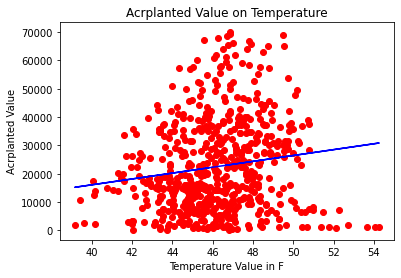

In [ ]:
# revise the plot into time-series 
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title('Acrplanted Value on Temperature')
plt.xlabel('Temperature Value in F')
plt.ylabel('Acrplanted Value')
plt.show()


(array([ 5.,  6., 11., 21., 30., 25., 17.,  6.,  1.,  1.]),
 array([114.55829323, 116.99983333, 119.44137343, 121.88291353,
        124.32445363, 126.76599373, 129.20753383, 131.64907393,
        134.09061403, 136.53215413, 138.97369423]),
 <a list of 10 Patch objects>)

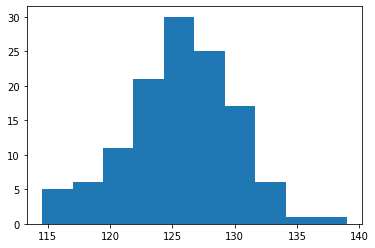

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_pre)

In [ ]:
## Linear Regression use 25%, 50%. and 75% in x 
X = acrplanted_temp[['avg_temp_25%','avg_temp_50%','avg_temp_75%','min_temp_75%','max_temp_75%']]
y = acrplanted_temp[['Value']]

# Split teh dataframe into train, validation, and test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = 0 )

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = 0 ) 

print(x_train, x_val, x_test)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

regression_results(y_val, y_pre)

     avg_temp_25%  avg_temp_50%  avg_temp_75%  min_temp_75%  max_temp_75%
811     33.691735     46.852748     61.609352     72.131808     72.131808
640     25.834898     45.526108     60.607164     72.678547     72.678547
587     30.192522     47.338953     63.869080     74.170624     74.170624
538     31.944947     48.772764     65.554364     79.129191     79.129191
425     29.226136     50.685567     63.569925     74.649183     74.649183
..            ...           ...           ...           ...           ...
763     33.172367     49.956855     63.149060     74.334581     74.334581
192     30.465616     45.348084     62.689958     74.521360     74.521360
629     29.860996     48.525592     61.110577     71.326942     71.326942
559     31.554334     47.896774     65.543804     77.292207     77.292207
684     30.579288     43.822622     63.727418     75.722637     75.722637

[615 rows x 5 columns]      avg_temp_25%  avg_temp_50%  avg_temp_75%  min_temp_75%  max_temp_75%
344     32.655

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

X = acrplanted_temp[['avg_temp_mean']]
y = acrplanted_temp[['Value']]

# Split teh dataframe into train, validation, and test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = 0 )

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = 0 ) 

print(x_train, x_val, x_test)

#Create a Gaussian Classifier
regressor=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_val)

regression_results(y_val, y_pre)

     avg_temp_mean
811      45.793223
640      42.027674
587      44.056382
538      47.951696
425      45.352303
..             ...
763      48.644869
192      46.450214
629      44.977254
559      47.578352
684      46.644163

[615 rows x 1 columns]      avg_temp_mean
344      48.103764
193      45.980473
215      47.265765
77       49.118819
477      48.172241
..             ...
249      48.315270
240      45.235898
475      47.419647
141      45.263810
375      44.625158

[123 rows x 1 columns]      avg_temp_mean
685      52.580139
658      45.884336
14       48.308853
746      46.005471
157      45.569293
..             ...
592      47.815608
392      49.441015
774      44.183321
638      43.776435
204      45.313888

[83 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


explained_variance:  0.0003
r2:  -1.882
MAE:  23145.522
MSE:  820184515.9654
RMSE:  28638.8637


In [ ]:
## RFR use 25%, 50%. and 75% in x 
X = acrplanted_temp[['avg_temp_25%','avg_temp_50%','avg_temp_75%','min_temp_75%','max_temp_75%']]
y = acrplanted_temp[['Value']]

# Split teh dataframe into train, validation, and test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = 0 )

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = 0 ) 

print(x_train, x_val, x_test)

#Create a Gaussian Classifier
regressor=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_val)

regression_results(y_val, y_pre)

     avg_temp_25%  avg_temp_50%  avg_temp_75%  min_temp_75%  max_temp_75%
811     33.691735     46.852748     61.609352     72.131808     72.131808
640     25.834898     45.526108     60.607164     72.678547     72.678547
587     30.192522     47.338953     63.869080     74.170624     74.170624
538     31.944947     48.772764     65.554364     79.129191     79.129191
425     29.226136     50.685567     63.569925     74.649183     74.649183
..            ...           ...           ...           ...           ...
763     33.172367     49.956855     63.149060     74.334581     74.334581
192     30.465616     45.348084     62.689958     74.521360     74.521360
629     29.860996     48.525592     61.110577     71.326942     71.326942
559     31.554334     47.896774     65.543804     77.292207     77.292207
684     30.579288     43.822622     63.727418     75.722637     75.722637

[615 rows x 5 columns]      avg_temp_25%  avg_temp_50%  avg_temp_75%  min_temp_75%  max_temp_75%
344     32.655

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


explained_variance:  0.0003
r2:  -1.882
MAE:  23145.522
MSE:  820184515.9654
RMSE:  28638.8637


In [ ]:
# Gaussian 
from sklearn.naive_bayes import GaussianNB

X = acrplanted_temp[['avg_temp_mean']]
y = acrplanted_temp[['Value']]

# Split teh dataframe into train, validation, and test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = 0 )

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = 0 ) 

print(x_train, x_val, x_test)

gauss = GaussianNB()
gauss.fit(x_train, y_train)
y_pred_gauss = gauss.predict(x_val)

regression_results(y_val, y_pred_gauss)

     avg_temp_mean
811      45.793223
640      42.027674
587      44.056382
538      47.951696
425      45.352303
..             ...
763      48.644869
192      46.450214
629      44.977254
559      47.578352
684      46.644163

[615 rows x 1 columns]      avg_temp_mean
344      48.103764
193      45.980473
215      47.265765
77       49.118819
477      48.172241
..             ...
249      48.315270
240      45.235898
475      47.419647
141      45.263810
375      44.625158

[123 rows x 1 columns]      avg_temp_mean
685      52.580139
658      45.884336
14       48.308853
746      46.005471
157      45.569293
..             ...
592      47.815608
392      49.441015
774      44.183321
638      43.776435
204      45.313888

[83 rows x 1 columns]
explained_variance:  -0.6292
r2:  -0.6407
MAE:  17387.8049
MSE:  466915528.4553
RMSE:  21608.2283


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




*   Small negative R2 value -0.6407, but high RMSE value, 21608.



In [ ]:
## RFR use 25%, 50%. and 75% in x 
X = acrplanted_temp[['avg_temp_25%','avg_temp_50%','avg_temp_75%','min_temp_75%','max_temp_75%']]
y = acrplanted_temp[['Value']]

# Split teh dataframe into train, validation, and test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = 0 )

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = 0 ) 

print(x_train, x_val, x_test)

gauss = GaussianNB()
gauss.fit(x_train, y_train)
y_pred_gauss = gauss.predict(x_val)

regression_results(y_val, y_pred_gauss)

     avg_temp_25%  avg_temp_50%  avg_temp_75%  min_temp_75%  max_temp_75%
811     33.691735     46.852748     61.609352     72.131808     72.131808
640     25.834898     45.526108     60.607164     72.678547     72.678547
587     30.192522     47.338953     63.869080     74.170624     74.170624
538     31.944947     48.772764     65.554364     79.129191     79.129191
425     29.226136     50.685567     63.569925     74.649183     74.649183
..            ...           ...           ...           ...           ...
763     33.172367     49.956855     63.149060     74.334581     74.334581
192     30.465616     45.348084     62.689958     74.521360     74.521360
629     29.860996     48.525592     61.110577     71.326942     71.326942
559     31.554334     47.896774     65.543804     77.292207     77.292207
684     30.579288     43.822622     63.727418     75.722637     75.722637

[615 rows x 5 columns]      avg_temp_25%  avg_temp_50%  avg_temp_75%  min_temp_75%  max_temp_75%
344     32.655

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




*   Adding more input variables, R2 improved from -0.6407 to -0.5104; and RMSE decreased 21608 from to 20732.

